# Logistic Regression
#### Written by Jessica Campbell

Logistic regression is a foundational model in supervised machine learning (ML), primarily used for binary classification problems. Unlike linear regression, which outputs continuous values, logistic regression predicts the probability that an input belongs to a particular class. It does this by applying the sigmoid (logistic) function to a linear combination of input features, producing outputs between 0 and 1 that can be interpreted as probabilities.

Mathematically, the logistic model is expressed as:

$$
\begin{aligned}
\hat{y} = \sigma(\mathbf{w}^\mathrm{T}\mathbf{x} + b) = \frac{1}{1 + e^{-(\mathbf{w}^\mathrm{T}\mathbf{x} + b)}}
\end{aligned}
$$

where:
- $\mathbf{x}$ is the input feature vector,
- $\mathbf{w}$ is the vector of learned weights,
- $b$ is the bias term,
- $\sigma$ is the sigmoid activation function.

The parameters $\mathbf{w}$ and $b$ are learned by minimizing a loss function (typically binary cross-entropy) which encourages the model to produce probabilities that match observed class labels.

This notebook begins by walking through the theoretical foundations of logistic regression, including its decision boundary, probabilistic interpretation, and optimization via gradient descent. Then, we demonstrate how the model is implemented and applied in practice using a Python example.

By the end of this notebook, you’ll understand both the mathematical intuition behind logistic regression and how to apply it to real classification tasks.


## Example Use Case
We will create a model to predict whether an internet user will click on an online ad based on qualities of the internet user.

We will create a model to predict whether an internet user will click on an online ad based on qualities of the internet user. This is a type of binary classification, so we will use a logistic regression model.

## Import Libraries

In [1]:
# math and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression

# set seaborn style
sns.set_style('whitegrid')

%matplotlib inline

## Data

This advertising data set contains the following features:

* 'Daily Time Spent on Site': time spent on site in minutes
* 'Age': cutomer age in years
* 'Area Income': average income of geographical area
* 'Daily Internet Usage': average time spent on the internet per day in minutes
* 'Ad Topic Line': headline of the ad
* 'City': city
* 'Male': whether or not internet user is male
* 'Country': country
* 'Timestamp': time at which ad was clicked on or window was closed
* 'Clicked on Ad': whether or not the ad was clicked on

In [2]:
ad_data = pd.read_csv('./data/advertising.csv')

**Check the header, info, and summary statistics.**

In [3]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

**Use a pairplot to visualize the entire data set and use hue to segment the data based on whether the internet user clicked on the ad.**

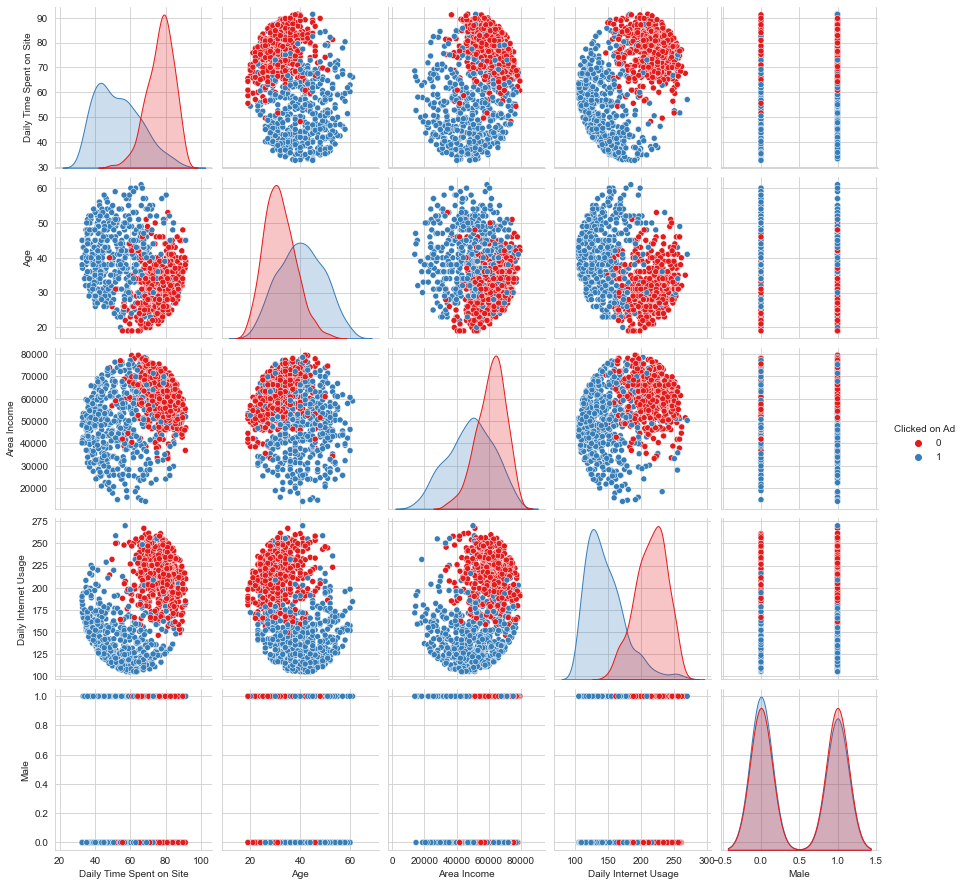

In [6]:
sns.pairplot(data=ad_data,hue='Clicked on Ad',palette='Set1')

**Use a histogram to visualize the age distribution.**

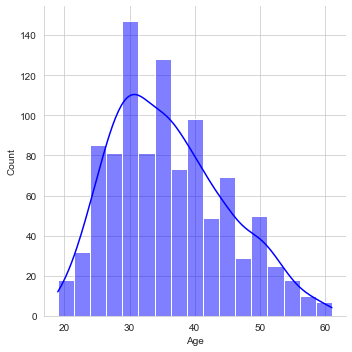

In [7]:
sns.displot(data=ad_data,x='Age',kde=True,color='blue')

**Use a joint plot to visualize area income versus age.**

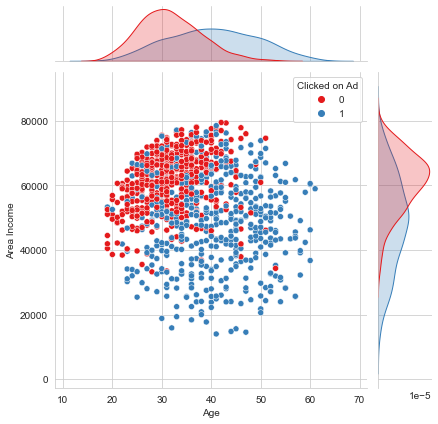

In [8]:
sns.jointplot(data=ad_data,x='Age',y='Area Income',hue='Clicked on Ad',palette='Set1')

**Use a joint plot to visualize daily time spent on the site vs. age.**

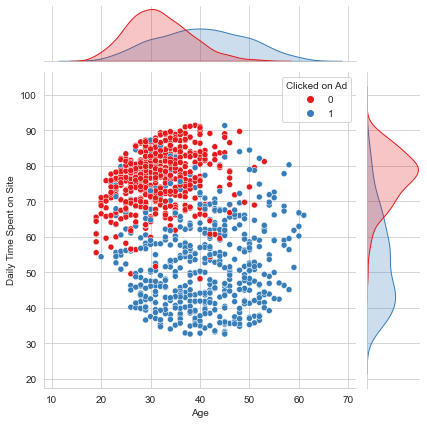

In [9]:
sns.jointplot(data=ad_data,x='Age',y='Daily Time Spent on Site',hue='Clicked on Ad',palette='Set1')

**Use a joint plot to visualize daily time spent on the site vs. daily internet usage.**

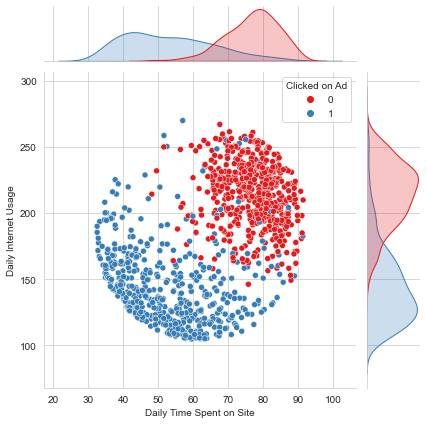

In [10]:
sns.jointplot(data=ad_data,x='Daily Time Spent on Site',y='Daily Internet Usage',hue='Clicked on Ad',palette='Set1')

**Investigate the number of unique ad topic lines.**

In [11]:
ad_data['Ad Topic Line'].nunique()

1000

# Building the Logistic Regression Model

We need to split the data into a training and testing set. Let's take a look at the header again to see what columns and data types we're working with.

In [12]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


Notice that the Country and City columnns are categorical. Rather than drop these features, we will convert them to dummy variables. Since the Ad Topic Line is different for every record, we will drop this feature along with the timestamp.

In [13]:
ad_data_final = pd.get_dummies(data=ad_data,columns=['Country','City'],drop_first=True)

In [14]:
ad_data_final.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,Male,Timestamp,Clicked on Ad,Country_Albania,Country_Algeria,...,City_Wintersfort,City_Wongland,City_Wrightburgh,City_Wrightview,City_Yangside,City_Youngburgh,City_Youngfort,City_Yuton,City_Zacharystad,City_Zacharyton
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,0,2016-03-27 00:53:11,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,80.23,31,68441.85,193.77,Monitored national standardization,1,2016-04-04 01:39:02,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,0,2016-03-13 20:35:42,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,1,2016-01-10 02:31:19,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,0,2016-06-03 03:36:18,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Split the data into a training set and testing set.**

In [15]:
X = ad_data_final.drop(['Clicked on Ad','Timestamp','Ad Topic Line'],axis=1)
y = ad_data_final['Clicked on Ad']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

**Train the logistic regression model using the training set.**

In [17]:
logm = LogisticRegression()
logm.fit(X_train,y_train)

LogisticRegression()

## Predictions and Evaluations
**Predict values using the testing data.**

In [18]:
y_predictions = logm.predict(X_test)

**Check confusion matrix and classification report for the logistic regression model.**

In [19]:
print(confusion_matrix(y_test,y_predictions))

[[149   8]
 [ 14 129]]


In [20]:
print(classification_report(y_test,y_predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300

